In [209]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [210]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [211]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [212]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [213]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [214]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [215]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

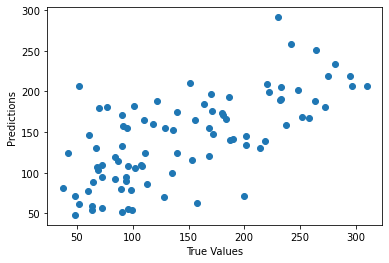

In [216]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [217]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [218]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [219]:
y = data['Value']

In [220]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [221]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [222]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

### MinMaxScaler

In [223]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [224]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [225]:
X_train

,Age,Overall,Potential,Jersey Number
0,0.230769,0.541667,0.723404,0.214286
1,0.500000,0.229167,0.191489,0.142857
2,0.461538,0.437500,0.404255,0.173469
3,0.423077,0.333333,0.297872,0.193878
4,0.423077,0.416667,0.382979,0.204082
...,...,...,...,...
14320,0.615385,0.375000,0.340426,0.112245
14321,0.423077,0.354167,0.319149,0.061224
14322,0.384615,0.500000,0.468085,0.132653
14323,0.384615,0.666667,0.680851,0.867347


In [226]:
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [227]:
X_test

,Age,Overall,Potential,Jersey Number
0,0.115385,0.354167,0.553191,0.316327
1,0.230769,0.395833,0.531915,0.071429
2,0.346154,0.145833,0.170213,0.000000
3,0.307692,0.583333,0.638298,0.010204
4,0.115385,0.354167,0.489362,0.163265
...,...,...,...,...
3577,0.653846,0.458333,0.425532,0.071429
3578,0.423077,0.395833,0.425532,0.153061
3579,0.423077,0.562500,0.553191,0.102041
3580,0.153846,0.354167,0.595745,0.295918


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [228]:
class MyMinMaxScaler():
    
    def __init__(self):
        pass

    def fit(self, X):
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)
        
    def transform(self, X):
        X_transformed = (X - self.min) / (self.max - self.min)
        return X_transformed

In [229]:
scaler = MyMinMaxScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)
scaled_test

,Age,Overall,Potential,Jersey Number
0,0.115385,0.354167,0.553191,0.316327
1,0.230769,0.395833,0.531915,0.071429
2,0.346154,0.145833,0.170213,0.000000
3,0.307692,0.583333,0.638298,0.010204
4,0.115385,0.354167,0.489362,0.163265
...,...,...,...,...
3577,0.653846,0.458333,0.425532,0.071429
3578,0.423077,0.395833,0.425532,0.153061
3579,0.423077,0.562500,0.553191,0.102041
3580,0.153846,0.354167,0.595745,0.295918


### Standard Scaler

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [232]:
X_train  = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

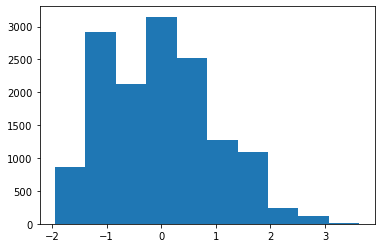

In [233]:
plt.hist(X_train.Age)
plt.show()

In [234]:
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
X_test

,Age,Overall,Potential,Jersey Number
0,-1.304214,-0.461592,0.434866,0.762713
1,-0.660939,-0.173982,0.272293,-0.722646
2,-0.017663,-1.899643,-2.491440,-1.155875
3,-0.232088,1.120264,1.085156,-1.093985
4,-1.304214,-0.461592,-0.052852,-0.165636
...,...,...,...,...
3577,1.697739,0.257434,-0.540569,-0.722646
3578,0.411188,-0.173982,-0.540569,-0.227526
3579,0.411188,0.976459,0.434866,-0.536976
3580,-1.089789,-0.461592,0.760011,0.638933


#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [235]:
class MyStandardScaler:
    
    def __init__(self):
        pass

    def fit(self, X):
        self.sd = np.std(X, axis=0)
        self.mean = np.mean(X, axis=0)
        
    def transform(self, X):
        X_transformed = (X - self.mean) / self.sd
        return X_transformed

In [236]:
scaler = MyStandardScaler()
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)
scaled_test


,Age,Overall,Potential,Jersey Number
0,-1.304214,-0.461592,0.434866,0.762713
1,-0.660939,-0.173982,0.272293,-0.722646
2,-0.017663,-1.899643,-2.491440,-1.155875
3,-0.232088,1.120264,1.085156,-1.093985
4,-1.304214,-0.461592,-0.052852,-0.165636
...,...,...,...,...
3577,1.697739,0.257434,-0.540569,-0.722646
3578,0.411188,-0.173982,-0.540569,-0.227526
3579,0.411188,0.976459,0.434866,-0.536976
3580,-1.089789,-0.461592,0.760011,0.638933


# tasks

###### try applying this scalers to any dataset and check the regression results

In [237]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [238]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [239]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [240]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.816667,1.0,0.405172,0.690141,0.544503,0.524900,0.220779,0.423131,0.590940,0.500000
1,0.450000,1.0,0.284483,0.323944,0.335079,0.406375,0.103896,0.564175,0.486602,0.575758
2,0.516667,0.0,0.556034,0.859155,0.356021,0.315737,0.337662,0.282087,0.551161,0.454545
3,0.366667,0.0,0.215517,0.338028,0.198953,0.181275,0.467532,0.141044,0.293531,0.030303
4,0.383333,0.0,0.094828,0.126761,0.267016,0.197211,0.571429,0.000000,0.342589,0.348485
...,...,...,...,...,...,...,...,...,...,...
348,0.050000,0.0,0.051724,0.281690,0.240838,0.256972,0.389610,0.141044,0.256548,0.196970
349,0.516667,1.0,0.478448,0.802817,0.272251,0.217131,0.415584,0.141044,0.518828,0.560606
350,0.633333,0.0,0.275862,0.436620,0.397906,0.273904,0.636364,0.141044,0.443568,0.500000
351,0.433333,0.0,0.262931,0.295775,0.350785,0.382470,0.298701,0.282087,0.337464,0.363636


In [241]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [242]:
model.score(X_test, y_test)

0.45260660216173787

In [243]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [244]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [245]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [246]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,1.498365,1.061370,0.219902,1.138877,0.728473,1.055893,-0.824451,0.711038,0.547560,-0.061449
1,-0.228858,1.061370,-0.419366,-0.710597,-0.424929,0.272425,-1.529791,1.484286,-0.019776,0.367236
2,0.085182,-0.942179,1.018987,1.992480,-0.309589,-0.326699,-0.119111,-0.062210,0.331260,-0.318660
3,-0.621409,-0.942179,-0.784662,-0.639464,-1.174640,-1.215508,0.664600,-0.835458,-1.069599,-2.719299
4,-0.542899,-0.942179,-1.423930,-1.706468,-0.799784,-1.110167,1.291569,-1.608706,-0.802848,-0.918820
...,...,...,...,...,...,...,...,...,...,...
348,-2.113102,-0.942179,-1.652240,-0.923998,-0.943960,-0.715141,0.194374,-0.835458,-1.270691,-1.776191
349,0.085182,1.061370,0.608029,1.707946,-0.770949,-0.978492,0.351116,-0.835458,0.155448,0.281499
350,0.634754,-0.942179,-0.465028,-0.141528,-0.078908,-0.603217,1.683425,-0.835458,-0.253776,-0.061449
351,-0.307368,-0.942179,-0.533521,-0.852865,-0.338424,0.114414,-0.354224,-0.062210,-0.830712,-0.833083


In [247]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [248]:
model.score(X_test, y_test)

0.45260660216173787

In [249]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


In [250]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [251]:
model.score(X_test, y_test)

-231.9688222115085

In [252]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 1110.992426954278
Train RMSE: 53.55881425327268


In [253]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [255]:
norm = StandardScaler().fit(X_train)

In [256]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [257]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [258]:
model.score(X_test, y_test)

0.4499045750576577

In [259]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 4332536.175036151
Train RMSE: 4108467.718850979
